In [6]:
import os, sys
import pandas as pd
import numpy as np

root_dir = os.path.join(os.getcwd(), '..')
sys.path.append(root_dir)

/Users/benjaminfeciura/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
#download the dataset
from src.d01_data import data_download as ddln


ddln.download_atlantic_hurdat_raw()

Downloaded data to /data/01_raw/Atlantic.csv


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,AL011851,UNNAMED,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18510625,0000,,HU,28.0N,94.8W,80.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,18510625,0600,,HU,28.0N,95.4W,80.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,18510625,1200,,HU,28.0N,96.0W,80.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,18510625,1800,,HU,28.1N,96.5W,80.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [ ]:
from src.d02_intermediate import clean_hurdat as clh

clh.partition_hurdat("Atlantic.csv")

In [ ]:
ddln.download_pacific_hurdat_raw()

In [ ]:
clh.partition_hurdat("Pacific.csv")

In [2]:
positions = pd.read_csv('../data/02_intermediate/Atlantic_positions.csv', index_col = 0)
storms = pd.read_csv('../data/02_intermediate/Atlantic_storms.csv', index_col = 0)

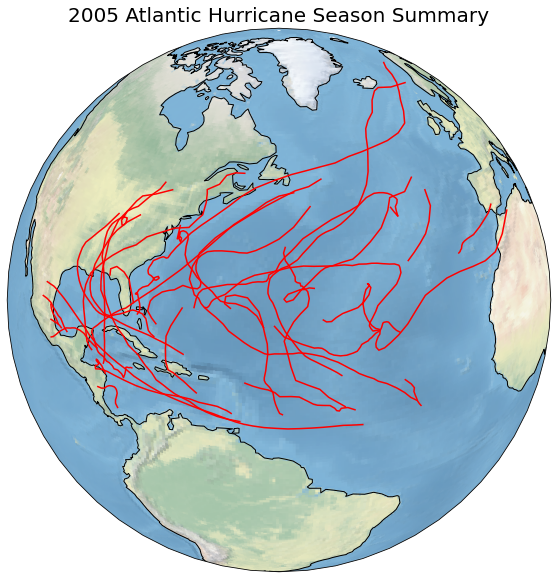

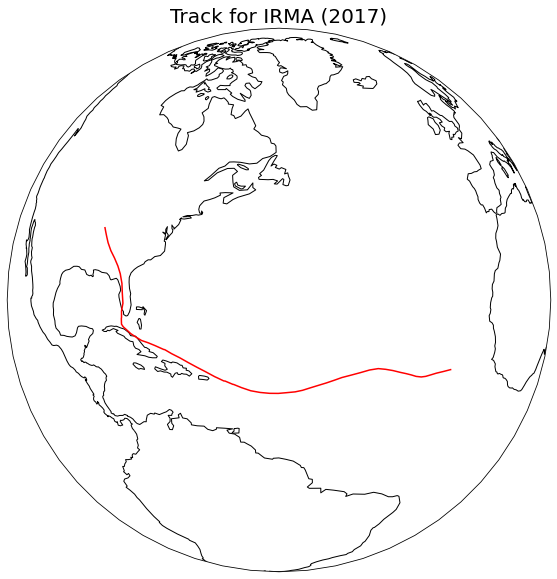

In [4]:
from src.d07_visualization import storm_tracks as trk

trk.plot_season_summary(2005, fullcolor = True, export = True)
trk.plot_storm_track(trk.stormID("IRMA", 2017), global_view = True)

/Users/benjaminfeciura/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


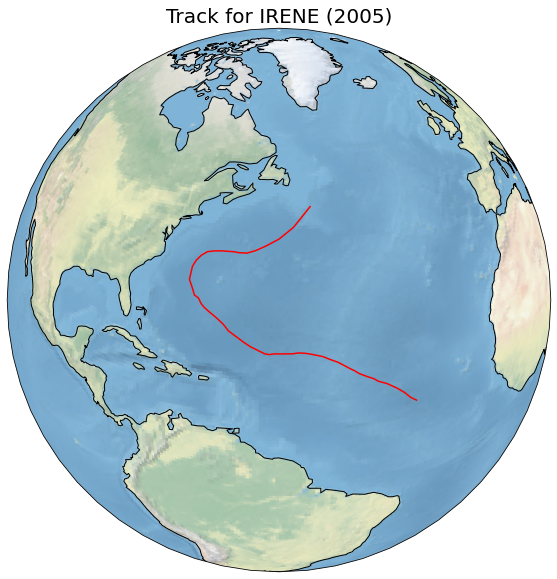

In [12]:
trk.plot_storm_track(trk.stormID("IRENE", 2005), global_view = True, fullcolor = True)

/Users/benjaminfeciura/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Enter a storm name: EMILY
Which year?: 2005


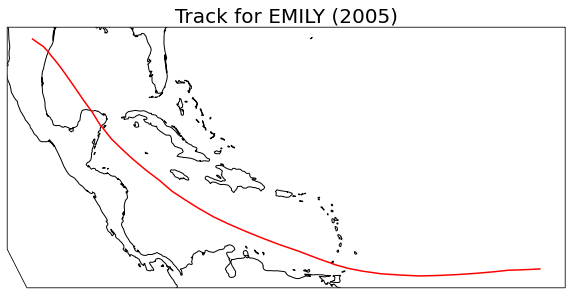

In [6]:
storm_name = input("Enter a storm name: ")
storm_year = int(input("Which year?: "))
trk.plot_storm_track(trk.stormID(storm_name, storm_year))

/Users/benjaminfeciura/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


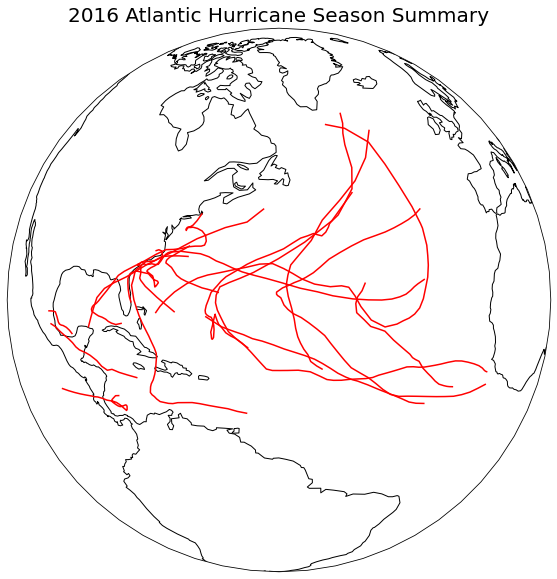

In [14]:
trk.plot_season_summary(2016, export = True)

In [3]:
from src.d07_visualization import wind_history as wh
from src.d07_visualization import storm_tracks as trk
from src.d03_processing import frequency as frq

In [8]:
freq_array = frq.season_frequency(2005)
freq_array = pd.DataFrame(freq_array, index = np.linspace(-90, 89, 180), columns = np.linspace(-180, 179, 360))

freq_array.to_csv(f"../data/03_processed/2005frequency.csv")

/Users/benjaminfeciura/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/benjaminfeciura/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


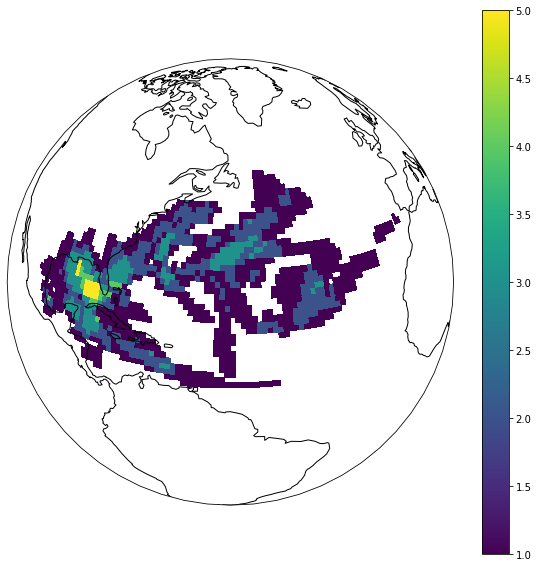

In [6]:
wh.wind_frequency_heatmap(freq_array)

/Users/benjaminfeciura/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


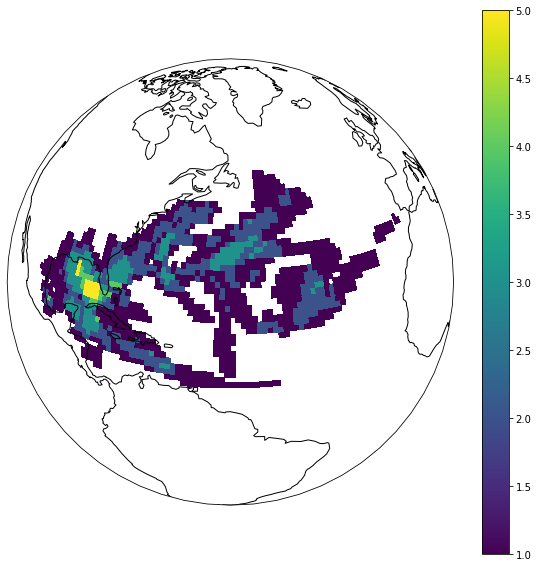

In [34]:
storms_05 = storms['stormID'][storms['year'] == 2005]
wh.wind_frequency_heatmap(storms_05)